In [470]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
df=pd.read_csv("movies.csv")
df.head()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13264\2892352391.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = df.corr()


<AxesSubplot: >

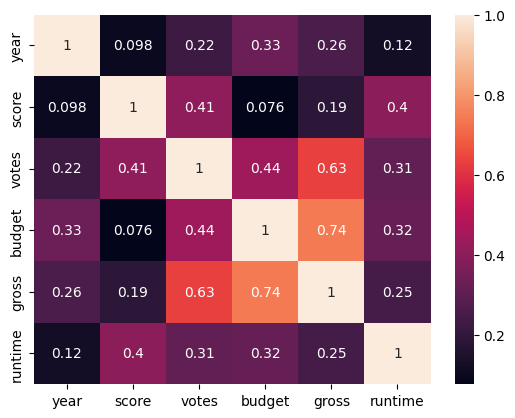

In [471]:
# Let's check how these values correlate.
cor = df.corr()
sns.heatmap(cor, annot=True)

In [472]:
# We can see most correlated values are "budget" and "gross". Values of "writer" and ""director" fallows this for the second.

In [473]:
#Cleaning the Data Frame
# We are eliminating values that we won't be using.
df = df[["gross","writer", "genre", "budget", "director", "score", "star"]]
df.head()


,gross,writer,genre,budget,director,score,star
0,46998772.0,Stephen King,Drama,19000000.0,Stanley Kubrick,8.4,Jack Nicholson
1,58853106.0,Henry De Vere Stacpoole,Adventure,4500000.0,Randal Kleiser,5.8,Brooke Shields
2,538375067.0,Leigh Brackett,Action,18000000.0,Irvin Kershner,8.7,Mark Hamill
3,83453539.0,Jim Abrahams,Comedy,3500000.0,Jim Abrahams,7.7,Robert Hays
4,39846344.0,Brian Doyle-Murray,Comedy,6000000.0,Harold Ramis,7.3,Chevy Chase


In [474]:
df = df[df["gross"].notnull()]
df = df[df["genre"].notnull()]
df = df[df["writer"].notnull()]
df =df[df["budget"].notnull()]
df =df[df["score"].notnull()]
df =df[df["director"].notnull()]
df =df[df["star"].notnull()]
df.head()

,gross,writer,genre,budget,director,score,star
0,46998772.0,Stephen King,Drama,19000000.0,Stanley Kubrick,8.4,Jack Nicholson
1,58853106.0,Henry De Vere Stacpoole,Adventure,4500000.0,Randal Kleiser,5.8,Brooke Shields
2,538375067.0,Leigh Brackett,Action,18000000.0,Irvin Kershner,8.7,Mark Hamill
3,83453539.0,Jim Abrahams,Comedy,3500000.0,Jim Abrahams,7.7,Robert Hays
4,39846344.0,Brian Doyle-Murray,Comedy,6000000.0,Harold Ramis,7.3,Chevy Chase


In [475]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5436 entries, 0 to 7652
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   gross     5436 non-null   float64
 1   writer    5436 non-null   object 
 2   genre     5436 non-null   object 
 3   budget    5436 non-null   float64
 4   director  5436 non-null   object 
 5   score     5436 non-null   float64
 6   star      5436 non-null   object 
dtypes: float64(3), object(4)
memory usage: 339.8+ KB


In [476]:
df.describe()

,gross,budget,score
count,5.436000e+03,5.436000e+03,5436.000000
mean,1.030045e+08,3.593864e+07,6.392642
std,1.871051e+08,4.154770e+07,0.963200
min,3.090000e+02,6.000000e+03,1.900000
25%,1.067412e+07,1.000000e+07,5.800000
50%,3.671199e+07,2.100000e+07,6.500000
75%,1.119478e+08,4.500000e+07,7.100000
max,2.847246e+09,3.560000e+08,9.300000


In [477]:
df = df.dropna()
df.isnull().sum()

gross       0
writer      0
genre       0
budget      0
director    0
score       0
star        0
dtype: int64

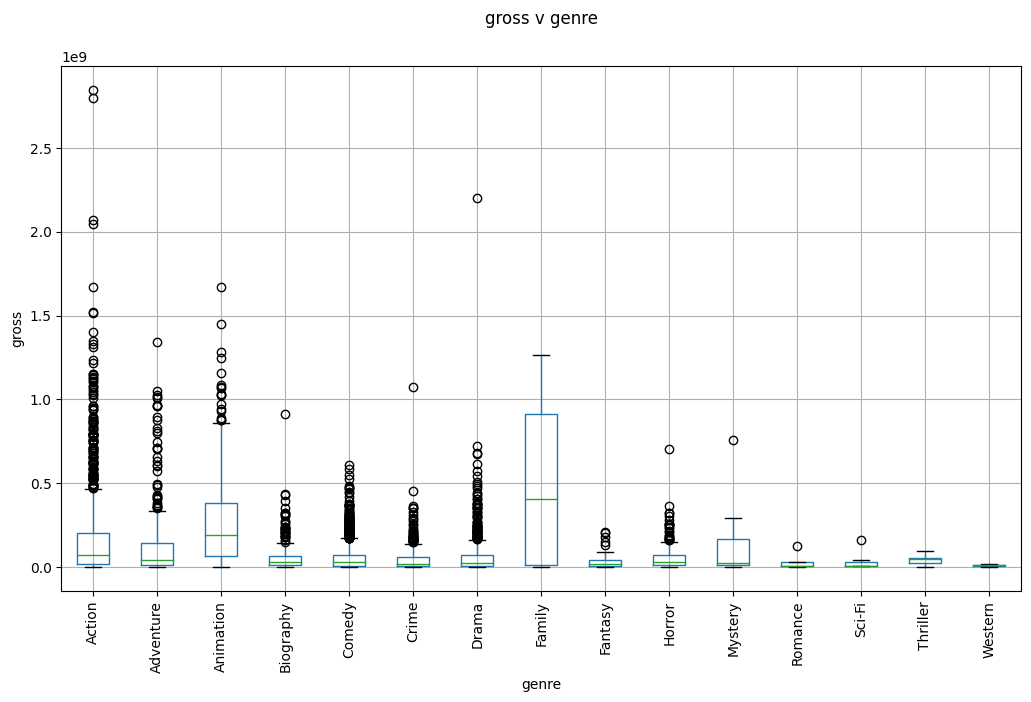

In [478]:
# Let's check how genre affects the gross of a movie.
ig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot('gross', 'genre', ax=ax)
plt.suptitle('gross v genre')
plt.title('')
plt.ylabel('gross')
plt.xticks(rotation=90)
plt.show()

In [479]:
df = df[df["gross"] <= 12.00000e+07]


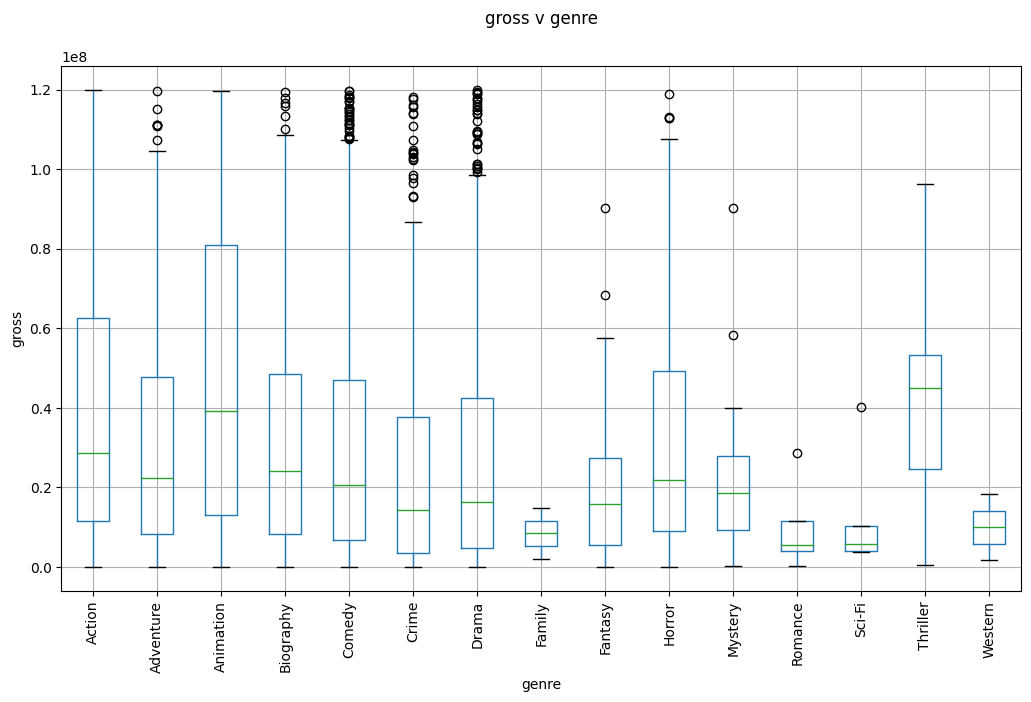

In [480]:
ig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot('gross', 'genre', ax=ax)
plt.suptitle('gross v genre')
plt.title('')
plt.ylabel('gross')
plt.xticks(rotation=90)
plt.show()

In [481]:
from sklearn.preprocessing import LabelEncoder

In [482]:
le_genre = LabelEncoder()
df['genre'] = le_genre.fit_transform(df['genre'])
df["genre"].unique()

array([ 6,  1,  4,  9,  0,  3,  5,  8,  2, 14, 12, 11, 13, 10,  7])

In [483]:
le_writer = LabelEncoder()
df['writer'] = le_writer.fit_transform(df['writer'])
df["writer"].unique()

array([2462, 1009, 1227, ..., 1978,  141, 1816])

In [484]:
le_director = LabelEncoder()
df['director'] = le_director.fit_transform(df['director'])
df["director"].unique()

array([1667, 1466,  820, ..., 1489, 1838,  268])

In [485]:
le_star = LabelEncoder()
df['star'] = le_star.fit_transform(df['star'])
df["star"].unique()

array([ 642,  198, 1367, ...,  115, 1580,    9])

In [486]:
X = df.drop("gross", axis=1)
y = df["gross"]

In [487]:
# Now we will try various machine learning models.

In [488]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X, y.values)
y_pred = linear_reg.predict(X)
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
error = np.sqrt(mean_squared_error(y, y_pred))
error

27406433.93459297

In [489]:
#Let's try another

In [490]:
from sklearn.tree import DecisionTreeRegressor
dec_tree_reg = DecisionTreeRegressor(random_state=0)
dec_tree_reg.fit(X, y.values)
DecisionTreeRegressor(random_state=0)
y_pred = dec_tree_reg.predict(X)
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$0.00


In [491]:
# Trying out Random Forest Regressor

In [492]:
from sklearn.ensemble import RandomForestRegressor
random_forest_reg = RandomForestRegressor(random_state=0)
random_forest_reg.fit(X, y.values)
RandomForestRegressor(random_state=0)
y_pred = random_forest_reg.predict(X)
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$10,396,735.42


In [493]:
# Trying out GridSearchCV.

In [494]:
from sklearn.model_selection import GridSearchCV

max_depth = [None]
parameters = {"max_depth": max_depth}

regressor = DecisionTreeRegressor(random_state=0)
gs = GridSearchCV(regressor, parameters, scoring='neg_mean_squared_error')
gs.fit(X, y.values)
GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')
regressor = gs.best_estimator_

regressor.fit(X, y.values)
y_pred = regressor.predict(X)
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$0.00


In [495]:
X

,writer,genre,budget,director,score,star
0,2462,6,19000000.0,1667,8.4,642
1,1009,1,4500000.0,1466,5.8,198
3,1227,4,3500000.0,820,7.7,1367
4,307,4,6000000.0,661,7.3,252
5,2680,9,550000.0,1635,6.4,144
...,...,...,...,...,...,...
7594,13,3,6000000.0,291,5.8,115
7604,756,6,350000.0,489,6.4,1580
7615,1978,9,2500000.0,1489,5.9,9
7616,141,0,1200000.0,1838,3.5,1500


In [496]:
X = np.array([["Stephen King", "Drama", 1000000.0, "Stanley Kubrick", 7, "Jack Nicholson"]])
X

array([['Stephen King', 'Drama', '1000000.0', 'Stanley Kubrick', '7',
        'Jack Nicholson']], dtype='<U32')

In [497]:
X[:, 0] = le_writer.transform(X[:,0])
X[:, 1] = le_genre.transform(X[:,1])
X[:, 3] = le_director.transform(X[:,3])
X[:, 5] = le_star.transform(X[:,5])

X = X.astype(float)
X

array([[2.462e+03, 6.000e+00, 1.000e+06, 1.667e+03, 7.000e+00, 6.420e+02]])

In [498]:
y_pred = regressor.predict(X)
y_pred

C:\Users\LENOVO\anaconda3\envs\gross\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([2023414.])

In [499]:
import pickle


In [500]:
data = {"model": regressor, "le_writer": le_writer, "le_genre": le_genre, "le_director": le_director, "le_star": le_star }
with open('saved_steps.pkl', 'wb') as file:
    pickle.dump(data, file)

In [501]:
with open('saved_steps.pkl', 'rb') as file:
    data = pickle.load(file)

regressor_loaded = data["model"]
le_writer = data["le_writer"]
le_genre = data["le_genre"]
le_director = data["le_director"]
le_star = data["le_star"]

In [502]:
y_pred = regressor_loaded.predict(X)
y_pred

C:\Users\LENOVO\anaconda3\envs\gross\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([2023414.])